**Daniel Fallis - "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."**

# MIS 665 Final Project

### Importing Packages

In [251]:
import requests
from lxml import html
import csv
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# scatter_matrix functionality
from pandas.plotting import scatter_matrix

import pingouin as pg

# Classifiers
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from IPython.display import display
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier

# regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

# f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# clustering
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

# advanced algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV
from statsmodels.formula.api import ols

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# sickit
import scikitplot as skplt

import warnings
warnings.filterwarnings("ignore")

# 1) Business and Data Understanding

**There is a large amount of research that has been done over predicting the success rate of movies. Through patterns, unique variables, and a variety of data, we are able to see many trends of successful and unsuccessful films. This projects purpose is to visualize these trends using this very large dataset and to observe which aspects of a film most heavily affect them. The second half of this project will also feature models that display results of tests run from this dataset through clustering, classification, and regression.**

In [98]:
# reading data and displaying first 10 results
df = pd.read_csv('data/movie_metadata.csv')
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [99]:
# basic correlation test
df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


**From this basic correlation test we can see that the number of people who voted for the movie and the number of critical reviews are the largest correlating variables to imdb_score. The variables involving the amount of likes on facebook do not contribute as much to the success rate as most would assume.**

# 2) Data Processing and Preparation

In [100]:
# basic statistisc 
df.describe().round(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.00,5028.0,4939.00,5020.00,5036.00,4.159000e+03,5043.00,5043.00,5030.00,5022.00,4.551000e+03,4935.00,5030.00,5043.00,4714.00,5043.00
mean,140.19,107.2,686.51,645.01,6560.05,4.846841e+07,83668.16,9699.06,1.37,272.77,3.975262e+07,2002.47,1651.75,6.44,2.22,7525.96
std,121.60,25.2,2813.33,1665.04,15020.76,6.845299e+07,138485.26,18163.80,2.01,377.98,2.061149e+08,12.47,4042.44,1.13,1.39,19320.45
min,1.00,7.0,0.00,0.00,0.00,1.620000e+02,5.00,0.00,0.00,1.00,2.180000e+02,1916.00,0.00,1.60,1.18,0.00
25%,50.00,93.0,7.00,133.00,614.00,5.340988e+06,8593.50,1411.00,0.00,65.00,6.000000e+06,1999.00,281.00,5.80,1.85,0.00
50%,110.00,103.0,49.00,371.50,988.00,2.551750e+07,34359.00,3090.00,1.00,156.00,2.000000e+07,2005.00,595.00,6.60,2.35,166.00
75%,195.00,118.0,194.50,636.00,11000.00,6.230944e+07,96309.00,13756.50,2.00,326.00,4.500000e+07,2011.00,918.00,7.20,2.35,3000.00
max,813.00,511.0,23000.00,23000.00,640000.00,7.605058e+08,1689764.00,656730.00,43.00,5060.00,1.221550e+10,2016.00,137000.00,9.50,16.00,349000.00


In [101]:
# checking column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [102]:
# count number of missing data values in each column
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [103]:
# checking size of dataset
df.shape

(5043, 28)

In [104]:
# dropping columns 
df = df.drop(['plot_keywords', 'aspect_ratio', 'color', 'language' ], axis = 1)

In [105]:
# counting missing values again
df.isnull().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
movie_imdb_link                0
num_user_for_reviews          21
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [106]:
# removing rows with missing values and checking new size of the dataset
df = df.dropna()
df.shape

(3827, 24)

In [107]:
# checking the list of values in 'content_rating'
df['content_rating'].value_counts()

R            1736
PG-13        1325
PG            574
G              89
Not Rated      40
Unrated        24
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

**I borrowed this sorting section from Yueming Zhang's report. He narrowed down the content rating and country columns to variables that could be used neatly in data visualization section. I am using the str.replace method to replace values.** 

In [108]:
# replacing content ratings to the ones we are most familiar with. 
df['content_rating'] = df['content_rating'].str.replace('Not Rated', 'R', case = False)
df['content_rating'] = df['content_rating'].str.replace('Unrated', 'R', case = False)
df['content_rating'] = df['content_rating'].str.replace('Approved', 'R', case = False)
df['content_rating'] = df['content_rating'].str.replace('Passed', 'R', case = False)

df['content_rating'] = df['content_rating'].str.replace('X', 'NC-17', case = False)
df['content_rating'] = df['content_rating'].str.replace('GP', 'PG', case = False)
df['content_rating'] = df['content_rating'].str.replace('M', 'PG', case = False)

#checking the list of values in 'content_rating' again
df['content_rating'].value_counts()

R        1820
PG-13    1325
PG        577
G          89
NC-17      16
Name: content_rating, dtype: int64

In [109]:
# checking the list of countries
df['country'].value_counts()
# most are in the US or UK so the others will be set to 'Other'

USA               3041
UK                 321
France             102
Germany             80
Canada              62
Australia           40
Spain               22
Japan               15
China               14
Hong Kong           13
Italy               11
New Zealand         11
Mexico              10
Denmark              9
South Korea          8
Ireland              7
India                5
Brazil               5
Iran                 4
Thailand             4
Norway               4
Czech Republic       3
Argentina            3
Netherlands          3
Russia               3
South Africa         3
Taiwan               2
Israel               2
Hungary              2
Romania              2
Belgium              1
Iceland              1
New Line             1
Indonesia            1
Georgia              1
Official site        1
Finland              1
Poland               1
Philippines          1
Aruba                1
Peru                 1
West Germany         1
Greece               1
Afghanistan

In [111]:
# replacing all countries to 'Other' and checking the new list
# .... ! replace?
df['country'] =df['country'].str.strip().replace(dict(zip(
    ['France', 'Germany', 'Canada', 'Australia', 'Spain', 'Japan', 'China', 'Hong Kong', 'Italy', 'New Zealand', 'Mexico',
    'Denmark', 'South Korea', 'Ireland', 'Brazil', 'India', 'Thailand', 'Norway', 'Iran', 'Russia', 'Czech Republic',
    'Argentina', 'Netherlands', 'South Africa', 'Taiwan', 'Hungary', 'Romania', 'Israel', 'Georgia', 'Aruba', 'West Other',
    'Official site', 'Philippines', 'Peru', 'Chile', 'Poland', 'Indonesia', 'Iceland', 'Afghanistan', 'Greece', 'Belgium', 
    'Colombia', 'Finland', 'New Line'], ['Other']*45)),regex=True)
df['country'].value_counts()

USA      3041
Other     465
UK        321
Name: country, dtype: int64

# 3) Business Intelligence

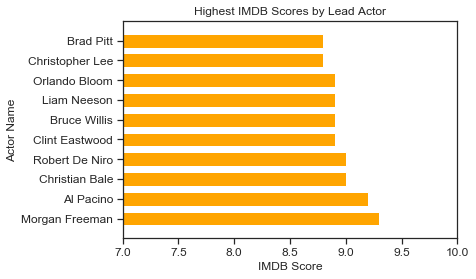

In [112]:
# Top ten highest IMDB Scores by lead actor. 
df.groupby('actor_1_name')['imdb_score'].max().sort_values(ascending = False).head(10).plot(
                                kind='barh', color='orange', width=.7, fontsize=12);
plt.xlabel('IMDB Score')
plt.ylabel('Actor Name')
plt.title('Highest IMDB Scores by Lead Actor')
plt.axis([7, 10, -1, 10])
plt.show()

**Top ten highest imdb_score by lead actor. Morgan Freeman was the lead in the highest scoring film with a 9.3.**

In [113]:
# Specifying only American movies because of foreign currency in the dataset
dfa = df.loc[df['country'] == 'USA']

**I will use the dfa dataset whenever I am visualizing data involving currency. The variables with these numbers in excel have not been adjusted to a single currency. Visualizations will be drasitcally different if we don't address this issue.**

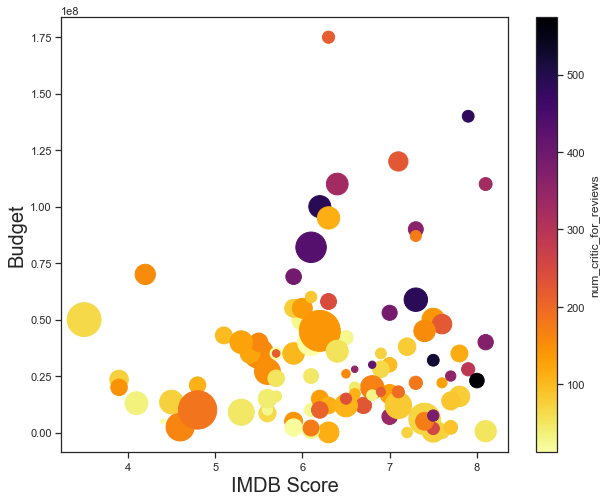

In [114]:
# graphing 
fig,ax=plt.subplots()
dfa.sample(100).plot(s=dfa['num_voted_users']/1000,figsize =(10,8)
                   
,x='imdb_score', y='budget', c='num_critic_for_reviews', kind='scatter'
                        ,cmap=plt.get_cmap('inferno_r')
                                                  ,ax=ax);

plt.title('', fontsize=20)
plt.xlabel('IMDB Score', fontsize=20)
plt.ylabel('Budget', fontsize=20)
plt.show()

**The Y axis is measured with the variable of budget and the X is the Imdb Score. The darker the colors, the more critical reviews, and the larger the points, the more votes for the movie. I decided to use .sample instead of .head so I could observe different results. Using a bigger set sample, we see a correlation of large and darker points on the higher end of the ibdm score.**

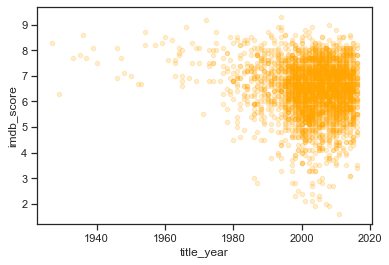

In [115]:
df.sample(3000).plot(kind = 'scatter', x='title_year', y='imdb_score', color='orange', alpha = .2);

**Around the year 1970, do movies begin to fall in imdb ratings. I found it interesting that the movies on this list before advances in technology scored very high, while many movie ratings dropped in the 80's and 2000's. The average is anywhere between a 5 and an 8 in recent times.**

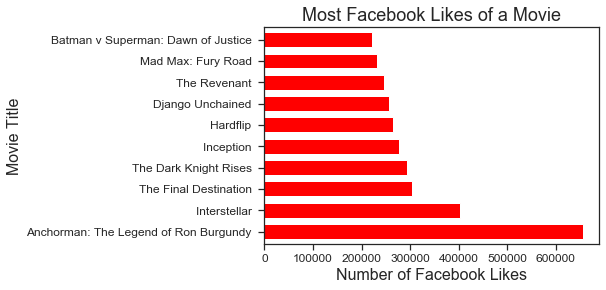

In [116]:
# making a total_likes column
df['Total_Likes'] = df['cast_total_facebook_likes'] + df['movie_facebook_likes'] + df['director_facebook_likes']
+ df['actor_1_facebook_likes'] + df['actor_2_facebook_likes'] + df['actor_3_facebook_likes']

# sorting and graphing by total likes by movie title
df.groupby('movie_title')['Total_Likes'].max().sort_values(ascending=False).head(10).plot(
                                kind='barh', color='red', width=.7, fontsize=12);

plt.xlabel('Number of Facebook Likes', fontsize=16)
plt.ylabel('Movie Title', fontsize=16)
plt.title('Most Facebook Likes of a Movie', fontsize=18);

**Newer movies that have been released during the time of Facebook are going to see the most results in this category. The number one result is a comedy movie featuring Will Ferrell, which was ahead by over twenty thousand likes.**

# 4) Correlation Analysis

In [117]:
# checking basic correlation
df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Total_Likes
num_critic_for_reviews,1.000000,0.236231,0.178012,0.255148,0.169718,0.470682,0.596677,0.240717,-0.034137,0.569123,0.107070,0.403293,0.256739,0.347535,0.703314,0.627059
duration,0.236231,1.000000,0.182224,0.127968,0.086305,0.250770,0.343418,0.123194,0.026501,0.355691,0.069587,-0.131072,0.131138,0.365548,0.217930,0.235201
director_facebook_likes,0.178012,0.182224,1.000000,0.118461,0.090524,0.140825,0.301300,0.119686,-0.047765,0.219281,0.018975,-0.046467,0.117268,0.191539,0.163236,0.274372
actor_3_facebook_likes,0.255148,0.127968,0.118461,1.000000,0.252621,0.301794,0.269718,0.489522,0.105706,0.207780,0.040848,0.114460,0.554052,0.066123,0.272825,0.483013
actor_1_facebook_likes,0.169718,0.086305,0.090524,0.252621,1.000000,0.146769,0.181709,0.945034,0.061591,0.124811,0.017360,0.093024,0.390980,0.093866,0.131628,0.656854
gross,0.470682,0.250770,0.140825,0.301794,0.146769,1.000000,0.628040,0.238520,-0.030454,0.548845,0.101339,0.048296,0.255222,0.215441,0.369523,0.400437
num_voted_users,0.596677,0.343418,0.301300,0.269718,0.181709,0.628040,1.000000,0.251615,-0.032242,0.780847,0.067848,0.017368,0.247260,0.479197,0.519161,0.522863
cast_total_facebook_likes,0.240717,0.123194,0.119686,0.489522,0.945034,0.238520,0.251615,1.000000,0.083961,0.182041,0.029815,0.123079,0.642435,0.107224,0.207054,0.742356
facenumber_in_poster,-0.034137,0.026501,-0.047765,0.105706,0.061591,-0.030454,-0.032242,0.083961,1.000000,-0.080361,-0.021514,0.071498,0.072173,-0.066913,0.016638,0.056347
num_user_for_reviews,0.569123,0.355691,0.219281,0.207780,0.124811,0.548845,0.780847,0.182041,-0.080361,1.000000,0.072438,0.012483,0.190033,0.324157,0.372872,0.376590


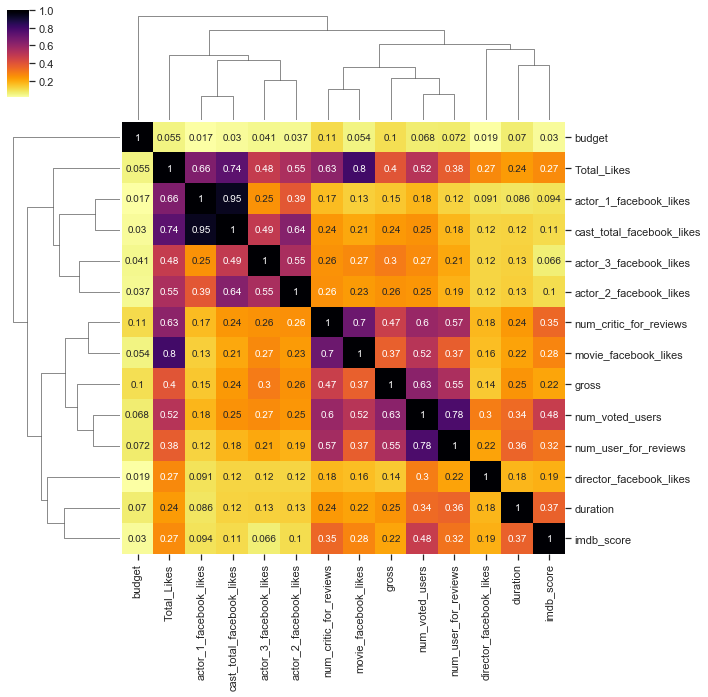

In [118]:
# dropping non-relevant columns and graphing the correlation on a clustermap
dfcor = df.drop(['facenumber_in_poster', 'title_year'], axis = 1)
sns.clustermap(data=dfcor.corr(), annot=True, cmap='inferno_r');

**The biggest correlating variables towards the imdb_score is num_voted_users,
num_critic_for_reviews, and num_user_for_reviews.**

**Number of votes and reviews by users and critics closley correlate with one another. The more you have one one variable, the more likely that the popularity of the film will spread, increasing the rest respectively.**

# 5) Regression

**imdb_score is our Y or Dependent Variable**

**Building a Linear Regression Model for the Y variable imdb_score while using num_critic_for_reviews as the X variable.**

In [155]:
# assigning columns to X and Y variables
X = dfcor['num_critic_for_reviews']
y = dfcor['imdb_score']

In [156]:
# creating the model and call it lr
model1 = lm.LinearRegression()
# training the model on our training dataset.
model1.fit(X[:,np.newaxis], y)    ## X needs to be 2d for LinearRegression so add [:,np.newaxis]
# predicting points with our trained model
model1_y = model1.predict(X[:,np.newaxis])

In [157]:
# coefficients
print('Coefficients: ', model1.coef_)
# y-intercept
print("y-intercept ", model1.intercept_)

Coefficients:  [0.00297188]
y-intercept  5.969215797805861


**This Linear Regression Model is y = .00297x - 5.969**

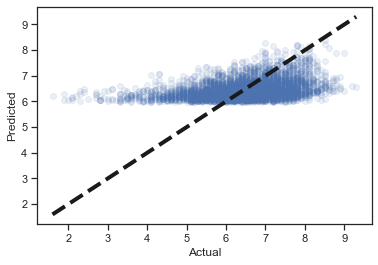

In [158]:
# scatter plot
plt.subplots()
plt.scatter(y, model1_y, alpha = .1)
#dotted line represents perfect prediction (actual = predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [159]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.9831384459090151
variance or r-squared:  0.12078073800149769


**Using just a single X Variable for predicting imdb_score, we can see R-Squared is rather low. I will test multiple models below to see how accurate we can get this number to be.**

In [160]:
# assigning columns to X and Y variables
# (this time let's use num_voted_users)
X = dfcor['num_voted_users']
y = dfcor['imdb_score']

In [162]:
# same as above 
model2 = lm.LinearRegression()
model2.fit(X[:,np.newaxis], y)
model2_y = model2.predict(X[:,np.newaxis])
print('Coefficients: ', model2.coef_)
print("y-intercept ", model2.intercept_)

Coefficients:  [3.35075136e-06]
y-intercept  6.111107775230617


**This Linear Regression Model is y = .00000335x + 6.11**

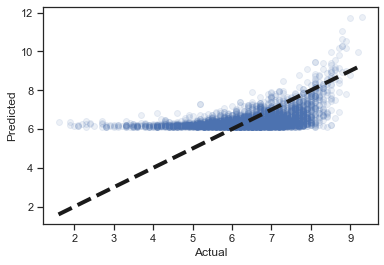

In [163]:
# scatter plot
plt.subplots()
plt.scatter(y, model2_y, alpha = .1)
#dotted line represents perfect prediction (actual = predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [165]:
print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.8614244312054508
variance or r-squared:  0.22962940181669167


**Like the previous model, one X variable is not enough to produce an accurate model. num_voted_users was slightly more accurate than num_critic_for_reviews. This can also be explained in a simple correlation test and the correlation visuals.**

## Multiple Regression

In [179]:
# assigning columns to X and Y variables
y = dfcor['imdb_score']
X = dfcor[['budget', 'Total_Likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes',
'actor_2_facebook_likes', 'actor_3_facebook_likes', 'num_critic_for_reviews',
'movie_facebook_likes', 'gross', 'num_voted_users', 'num_user_for_reviews', 
'director_facebook_likes', 'duration']]

In [180]:
y.head(2)

0    7.9
1    7.1
Name: imdb_score, dtype: float64

In [181]:
X.head(2)

,budget,Total_Likes,actor_1_facebook_likes,cast_total_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,num_critic_for_reviews,movie_facebook_likes,gross,num_voted_users,num_user_for_reviews,director_facebook_likes,duration
0,237000000.0,37834.0,1000.0,4834,936.0,855.0,723.0,33000,760505847.0,886204,3054.0,0.0,178.0
1,300000000.0,48913.0,40000.0,48350,5000.0,1000.0,302.0,0,309404152.0,471220,1238.0,563.0,169.0


In [182]:
# building a multiple regression model
model3 = lm.LinearRegression()
model3.fit(X, y)   
model3_y = model3.predict(X)

In [183]:
# displaying the columns with their coefficients to Y
pd.DataFrame(list(zip(X.columns, np.transpose(model3.coef_))))

,0,1
0,budget,-5.711133e-11
1,Total_Likes,-1.839495e-05
2,actor_1_facebook_likes,7.862475e-05
3,cast_total_facebook_likes,-5.986723e-05
4,actor_2_facebook_likes,8.068811e-05
5,actor_3_facebook_likes,7.573300e-05
6,num_critic_for_reviews,1.562683e-03
7,movie_facebook_likes,1.554395e-05
8,gross,-1.781389e-09
9,num_voted_users,4.020466e-06


In [184]:
print("mean square error: ", mean_squared_error(y, model3_y))
print("variance or r-squared: ", explained_variance_score(y, model3_y))

mean square error:  0.7550793257376354
variance or r-squared:  0.3247336727722582


**The R-Squared is much better compared to the previous models**

## f_regression

In [198]:
# selecting four variables for f_regression
X_new = SelectKBest(f_regression, k=4).fit_transform(X, y)
X_new

array([[7.23000e+02, 8.86204e+05, 3.05400e+03, 1.78000e+02],
       [3.02000e+02, 4.71220e+05, 1.23800e+03, 1.69000e+02],
       [6.02000e+02, 2.75868e+05, 9.94000e+02, 1.48000e+02],
       ...,
       [5.60000e+01, 5.20550e+04, 1.30000e+02, 8.10000e+01],
       [1.40000e+01, 1.33800e+03, 1.40000e+01, 9.50000e+01],
       [4.30000e+01, 4.28500e+03, 8.40000e+01, 9.00000e+01]])

In [199]:
# Using f_regression to find what it thinks the 4 most important variables are

selector = SelectKBest(f_regression, k=4).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[ 6  9 10 12]


In [200]:
X.head(2)

,budget,Total_Likes,actor_1_facebook_likes,cast_total_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,num_critic_for_reviews,movie_facebook_likes,gross,num_voted_users,num_user_for_reviews,director_facebook_likes,duration
0,237000000.0,37834.0,1000.0,4834,936.0,855.0,723.0,33000,760505847.0,886204,3054.0,0.0,178.0
1,300000000.0,48913.0,40000.0,48350,5000.0,1000.0,302.0,0,309404152.0,471220,1238.0,563.0,169.0


**f_regression determined that num_critic_for_reviews, num_voted_users, num_user_for_reviews, and duration, are the most important variables.**

In [201]:
model4 = lm.LinearRegression()
model4.fit(X_new, y)
model4_y = model4.predict(X_new)

print("mean square error: ", mean_squared_error(y, model4_y))
print("variance or r-squared: ", explained_variance_score(y, model4_y))

mean square error:  0.7862531913649031
variance or r-squared:  0.2968549307247893


## Recursive Feature Selection

In [202]:
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print("Features sorted by their rank:")
print(sorted(zip([x for x in rfe.ranking_], X.columns)))

Features sorted by their rank:
[(1, 'duration'), (1, 'num_critic_for_reviews'), (2, 'num_user_for_reviews'), (3, 'actor_3_facebook_likes'), (4, 'actor_2_facebook_likes'), (5, 'actor_1_facebook_likes'), (6, 'cast_total_facebook_likes'), (7, 'director_facebook_likes'), (8, 'movie_facebook_likes'), (9, 'Total_Likes'), (10, 'num_voted_users'), (11, 'gross'), (12, 'budget')]


In [203]:
# trying a few models with fewer predictors 
# model 1
r_model1 = ols("imdb_score~duration+num_critic_for_reviews+num_user_for_reviews", dfcor)
reg1 = r_model1.fit()

# model 2 
r_model2 = ols("imdb_score~duration+num_critic_for_reviews", dfcor)
reg2 = r_model2.fit()

# model 3
r_model3 = ols("imdb_score~duration", dfcor)
reg3 = r_model3.fit()

In [204]:
print(reg1.summary())
print(reg2.summary())
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     342.1
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          9.05e-197
Time:                        09:09:16   Log-Likelihood:                -5189.0
No. Observations:                3827   AIC:                         1.039e+04
Df Residuals:                    3823   BIC:                         1.041e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

- The first model has an Adj. R-Squared of .211
- The second model has an Adj. R-Squared of .205
- The third model has an Adj. R-Squared of .133

# 6) Classification 

In [230]:
# BINNING IDBM SCORES

dfcor['imdb_labels'] = pd.cut(dfcor['imdb_score'], 
    bins=[0, 4, 6, 8, 10], labels=[0, 1, 2, 3])

# 0 (bad), 1 (ok), 2 (good), 3 (excellent)

In [241]:
# checking the dataset again
dfclass = dfcor.drop(['director_name', 'actor_2_name', 'actor_3_name',
                     'actor_1_name', 'genres', 'movie_title',
                     'movie_imdb_link', 'country', 'content_rating',], axis = 1)
dfclass.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Total_Likes,imdb_labels
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,936.0,7.9,33000,37834.0,2
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,5000.0,7.1,0,48913.0,2
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,393.0,6.8,85000,96700.0,2
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,23000.0,8.5,164000,292759.0,3
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,632.0,6.6,24000,26348.0,2


In [243]:
dfclass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3827 entries, 0 to 5042
Data columns (total 15 columns):
num_critic_for_reviews       3827 non-null float64
duration                     3827 non-null float64
director_facebook_likes      3827 non-null float64
actor_3_facebook_likes       3827 non-null float64
actor_1_facebook_likes       3827 non-null float64
gross                        3827 non-null float64
num_voted_users              3827 non-null int64
cast_total_facebook_likes    3827 non-null int64
num_user_for_reviews         3827 non-null float64
budget                       3827 non-null float64
actor_2_facebook_likes       3827 non-null float64
imdb_score                   3827 non-null float64
movie_facebook_likes         3827 non-null int64
Total_Likes                  3827 non-null float64
imdb_labels                  3827 non-null category
dtypes: category(1), float64(11), int64(3)
memory usage: 612.4 KB


**Here we start building the classification model. We will use this X and y for the decision tree, cross validation, and Random Forest.** 

In [244]:
# declaring X variables and Y variable

y = dfclass['imdb_labels']
X = dfclass.drop(['imdb_score', 'imdb_labels'], axis =1)

print(y.shape, X.shape)

(3827,) (3827, 13)


In [245]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# initializing DecisionTreeClassifer()
dt = DecisionTreeClassifier()

# training a decision tree model
dt = dt.fit(X_train, y_train)

In [246]:
print(len(X_train), len(X_test))

2564 1263


In [248]:
# model evaluation
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")

0.6484560570071259
--------------------------------------------------------
[[  5  20  10   0]
 [ 20 173 149   1]
 [ 16 180 609  25]
 [  1   1  21  32]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.12      0.14      0.13        35
           1       0.46      0.50      0.48       343
           2       0.77      0.73      0.75       830
           3       0.55      0.58      0.57        55

    accuracy                           0.65      1263
   macro avg       0.48      0.49      0.48      1263
weighted avg       0.66      0.65      0.65      1263

--------------------------------------------------------


## 10 Fold Cross Validation

In [249]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.66666667 0.59375    0.70833333 0.64229765 0.73629243 0.65535248
 0.63968668 0.65354331 0.5984252  0.54855643]
0.6442904177203045


In [250]:
# mean score and 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.64 (+/- 0.10)


## Random Forest

In [252]:
# building 20 decision trees
clf = RandomForestClassifier(n_estimators=20)
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7474267616785432

In [253]:
# evaluation metrics 
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.7474267616785432
[[  0  23  12   0]
 [  2 186 155   0]
 [  0  93 729   8]
 [  0   0  26  29]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.62      0.54      0.58       343
           2       0.79      0.88      0.83       830
           3       0.78      0.53      0.63        55

    accuracy                           0.75      1263
   macro avg       0.55      0.49      0.51      1263
weighted avg       0.72      0.75      0.73      1263



**Another method is Feature Selection (selecting important variables)**

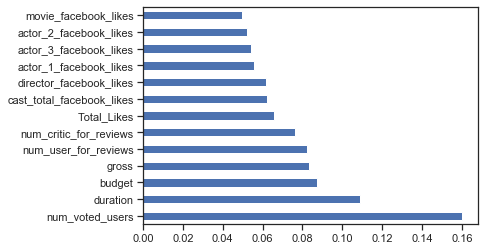

In [254]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

**This model selected num_voted_users, duration, and budget as the most influential variables**


# 7) Clustering

In [211]:
dfcor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3827 entries, 0 to 5042
Data columns (total 23 columns):
director_name                3827 non-null object
num_critic_for_reviews       3827 non-null float64
duration                     3827 non-null float64
director_facebook_likes      3827 non-null float64
actor_3_facebook_likes       3827 non-null float64
actor_2_name                 3827 non-null object
actor_1_facebook_likes       3827 non-null float64
gross                        3827 non-null float64
genres                       3827 non-null object
actor_1_name                 3827 non-null object
movie_title                  3827 non-null object
num_voted_users              3827 non-null int64
cast_total_facebook_likes    3827 non-null int64
actor_3_name                 3827 non-null object
movie_imdb_link              3827 non-null object
num_user_for_reviews         3827 non-null float64
country                      3827 non-null object
content_rating               3827 non-

In [273]:
dfcluster = dfcor.drop(['director_name', 'actor_2_name', 'genres', 
                       'actor_1_name', 'movie_title', 'actor_3_name',
                       'movie_imdb_link', 'country', 'content_rating'], axis=1)
dfcluster.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Total_Likes,imdb_labels
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,936.0,7.9,33000,37834.0,2
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,5000.0,7.1,0,48913.0,2
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,393.0,6.8,85000,96700.0,2
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,23000.0,8.5,164000,292759.0,3
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,632.0,6.6,24000,26348.0,2


In [215]:
df_norm = (dfcluster - dfcluster.mean()) / (dfcluster.max() - dfcluster.min())
df_norm.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Total_Likes
0,0.687278,0.232036,-0.034484,0.004042,-0.010416,0.932009,0.462952,-0.009996,0.538207,0.015678,-0.007731,0.187095,0.068159,0.025008
1,0.168805,0.201320,-0.010005,0.010347,0.050522,0.338849,0.217362,0.056266,0.179243,0.020835,0.021934,0.083199,-0.026397,0.041871
2,0.538264,0.129647,-0.034484,-0.026131,0.005209,0.195089,0.101751,0.000459,0.131012,0.016333,-0.011694,0.044238,0.217156,0.114608
3,0.798116,0.184255,0.922038,0.966869,0.030209,0.521262,0.615717,0.145205,0.468430,0.016742,0.153320,0.265017,0.443517,0.413029
5,0.365850,0.075040,-0.013832,-0.010088,-0.010978,0.028074,0.064074,-0.014504,0.080409,0.017863,-0.009950,0.018264,0.042371,0.007525


In [216]:
df_norm.var()

num_critic_for_reviews       0.023198
duration                     0.005932
director_facebook_likes      0.017485
actor_3_facebook_likes       0.006668
actor_1_facebook_likes       0.000583
gross                        0.008469
num_voted_users              0.008012
cast_total_facebook_likes    0.000839
num_user_for_reviews         0.006551
budget                       0.000336
actor_2_facebook_likes       0.001085
imdb_score                   0.018865
movie_facebook_likes         0.003724
Total_Likes                  0.002380
dtype: float64

## KMeans Clustering

In [280]:
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [281]:
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [282]:
k_means.labels_

array([3, 3, 3, ..., 2, 0, 2])

In [283]:
k_means.cluster_centers_

array([[-9.55352835e-02, -3.87408097e-02, -2.98251997e-02,
        -1.06483782e-02, -4.19679960e-03, -3.11145681e-02,
        -4.52211478e-02, -5.89105766e-03, -3.43112135e-02,
        -1.29481658e-03, -6.36684630e-03, -1.55090409e-01,
        -2.21354776e-02, -1.86915351e-02],
       [ 1.02748759e-01,  5.43107645e-02,  6.06220428e-01,
         3.55388548e-02,  9.42474448e-03,  5.35326471e-02,
         1.04691442e-01,  1.41949841e-02,  6.89683305e-02,
         6.85556283e-04,  1.47610519e-02,  1.08615308e-01,
         3.57021006e-02,  5.43775979e-02],
       [-2.46781339e-02,  5.33168546e-03, -2.67181429e-02,
        -9.95328513e-03, -8.67743401e-04, -1.54897410e-02,
        -1.73786720e-02, -1.99180512e-03, -1.50816643e-02,
        -5.74532683e-04, -2.57120425e-03,  5.21096875e-02,
        -1.31949290e-02, -9.93569990e-03],
       [ 2.47345171e-01,  4.36429321e-02, -2.21077915e-02,
         4.55428775e-02,  8.70600503e-03,  1.00549091e-01,
         1.20659501e-01,  1.46177922e-02,  1.

In [284]:
# adding cluster column to dfcluster
dfc = pd.DataFrame(k_means.labels_, columns = ['cluster'])
dfc.head()

,cluster
0,3
1,3
2,3
3,1
4,3


In [285]:
dfcluster = df.join(dfc)
dfcluster.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Total_Likes,cluster
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,37834.0,3.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,48913.0,3.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,96700.0,3.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,292759.0,1.0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,26348.0,3.0


In [286]:
dfcluster['cluster'].value_counts()

2.0    1666
0.0     967
3.0     497
1.0     140
Name: cluster, dtype: int64

In [287]:
dfcluster.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Total_Likes
cluster,,,,,,,,,,,,,,,,
0.0,162.250259,110.839710,750.571872,768.637022,7818.103413,4.880945e+07,99501.132368,11724.564633,1.497415,318.904860,3.644782e+07,2003.434333,2165.443640,6.404240,8497.585315,20972.721820
1.0,205.421429,117.750000,1115.021429,1005.278571,8513.921429,8.026889e+07,166625.357143,13234.214286,1.157143,485.978571,5.948429e+07,2003.664286,2340.914286,6.625714,16878.821429,31228.057143
2.0,162.249700,110.528812,836.693277,743.896158,7806.442977,4.958176e+07,102432.895558,11475.197479,1.405162,318.265306,4.751683e+07,2003.277911,1929.806723,6.398920,8559.925570,20871.816327
3.0,217.661972,115.704225,1199.205231,1254.219316,10408.034205,9.863260e+07,160821.571429,16206.360161,1.406439,492.907445,8.470742e+07,2004.603622,3202.921529,6.534406,15228.205231,32633.770624


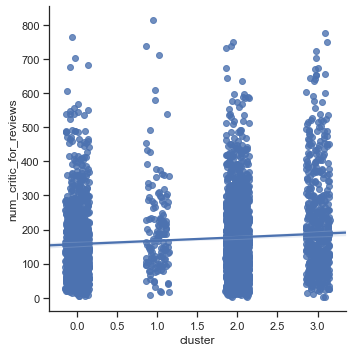

In [288]:
sns.lmplot("cluster", "num_critic_for_reviews", dfcluster, x_jitter=.15, y_jitter=.15)

**Using num_critic_for_reviews for this cluster plot above**

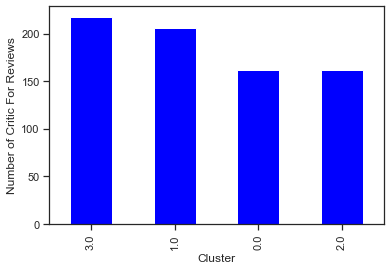

In [298]:
dfcluster.groupby('cluster')['num_critic_for_reviews'].mean().sort_values(ascending = False).plot(kind='bar', color='blue')
plt.xlabel('Cluster')
plt.ylabel('Number of Critic For Reviews')
plt.show()

## Hierarchical or Agglomerative Clustering

In [289]:
dfcluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3827 entries, 0 to 5042
Data columns (total 26 columns):
director_name                3827 non-null object
num_critic_for_reviews       3827 non-null float64
duration                     3827 non-null float64
director_facebook_likes      3827 non-null float64
actor_3_facebook_likes       3827 non-null float64
actor_2_name                 3827 non-null object
actor_1_facebook_likes       3827 non-null float64
gross                        3827 non-null float64
genres                       3827 non-null object
actor_1_name                 3827 non-null object
movie_title                  3827 non-null object
num_voted_users              3827 non-null int64
cast_total_facebook_likes    3827 non-null int64
actor_3_name                 3827 non-null object
facenumber_in_poster         3827 non-null float64
movie_imdb_link              3827 non-null object
num_user_for_reviews         3827 non-null float64
country                      3827 non

In [290]:
dfcluster2 = dfcluster.drop(['director_name', 'actor_2_name', 'genres', 
                       'actor_1_name', 'movie_title', 'actor_3_name',
                       'movie_imdb_link', 'country', 'content_rating',
                        'num_voted_users', 'cast_total_facebook_likes',
                        'movie_facebook_likes'], axis=1)
dfcluster2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,Total_Likes,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,0.0,3054.0,237000000.0,2009.0,936.0,7.9,37834.0,3.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,48913.0,3.0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,1.0,994.0,245000000.0,2015.0,393.0,6.8,96700.0,3.0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,292759.0,1.0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,1.0,738.0,263700000.0,2012.0,632.0,6.6,26348.0,3.0


In [291]:
X = (dfcluster2 - dfcluster2.mean()) / (dfcluster2.max() - dfcluster2.min())
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,Total_Likes,cluster
0,0.687278,0.232036,-0.034484,0.004042,-0.010416,0.932009,-0.032061,0.538207,0.015678,0.066647,-0.007731,0.187095,0.025008,0.494088
1,0.168805,0.201320,-0.010005,0.010347,0.050522,0.338849,-0.032061,0.179243,0.020835,0.044175,0.021934,0.083199,0.041871,0.494088
2,0.538264,0.129647,-0.034484,-0.026131,0.005209,0.195089,-0.008805,0.131012,0.016333,0.134062,-0.011694,0.044238,0.114608,0.494088
3,0.798116,0.184255,0.922038,0.966869,0.030209,0.521262,-0.032061,0.468430,0.016742,0.100354,0.153320,0.265017,0.413029,-0.172579
5,0.365850,0.075040,-0.013832,-0.010088,-0.010978,0.028074,-0.008805,0.080409,0.017863,0.100354,-0.009950,0.018264,0.007525,0.494088


# 8) Storytelling

**The three largest factors to a movie's imdb_score we saw in the correlation section were...**

- number of people who voted for the movie
- number of critical reviews on imdb
- number of users who gave a review 

**Higher number of both critical reviews and/or user reviews does not necessarily mean a higher imdb score. There are multiple variablse that are effecting the imdb, and an accurate model is very difficult to create.**

**In the regression section of this project our Multiple Regression model produced the most accurate results. I used a total of 13 numerical variables from the dataset for the calculation of the model.**

- the mean square error was .7551
- the variance (r-squared) was .3247

**The f_regression model, which chose 4 variables itself, also produced a higher r-squared at .2969**

**Overall the models were accurate for the dataset that was given. We can see from these regression models, that multiple variables are needed in order to produce a more accurate model for predicted the imdb score. There is not simply one variable that is making a drastic difference in the equation.**